### import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Load datasets

In [ ]:

customers = pd.read_csv(r"C:\Users\bhara\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\bhara\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\bhara\Downloads\Transactions.csv")

### Convert date columns to datetime format

In [2]:

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

### Display basic info

In [3]:

print("Customers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to

### Check for missing values

In [4]:

print("\nMissing Values:")
print("Customers:")
print(customers.isnull().sum())
print("Products:")
print(products.isnull().sum())
print("Transactions:")
print(transactions.isnull().sum())



Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Check for duplicates

In [5]:

print("\nDuplicate Values:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())



Duplicate Values:
Customers: 0
Products: 0
Transactions: 0


### Basic statistics

In [6]:
print("\nTransaction Statistics:")
print(transactions.describe())



Transaction Statistics:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


### Merge transactions with products and customers

In [7]:

transactions = transactions.merge(products, on='ProductID', how='left')
transactions = transactions.merge(customers, on='CustomerID', how='left')

In [9]:
import warnings
warnings.filterwarnings('ignore')

### Customer distribution by region

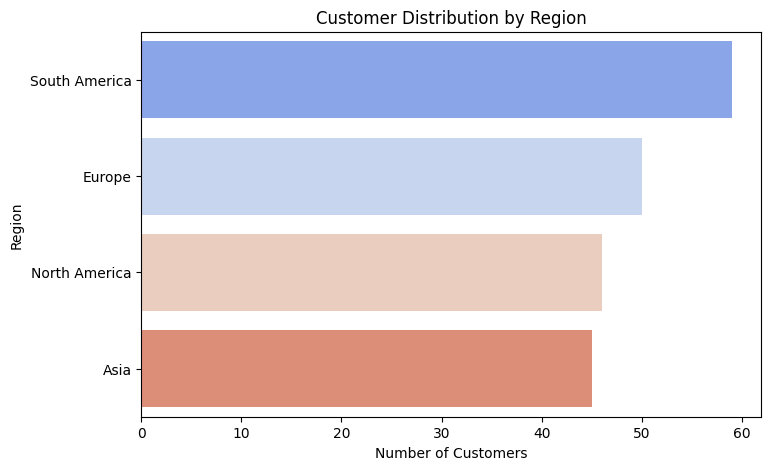

In [10]:

plt.figure(figsize=(8, 5))
sns.countplot(y=customers['Region'], order=customers['Region'].value_counts().index, palette='coolwarm')
plt.title("Customer Distribution by Region")
plt.xlabel("Number of Customers")
plt.ylabel("Region")
plt.show()


### Average transaction value per region

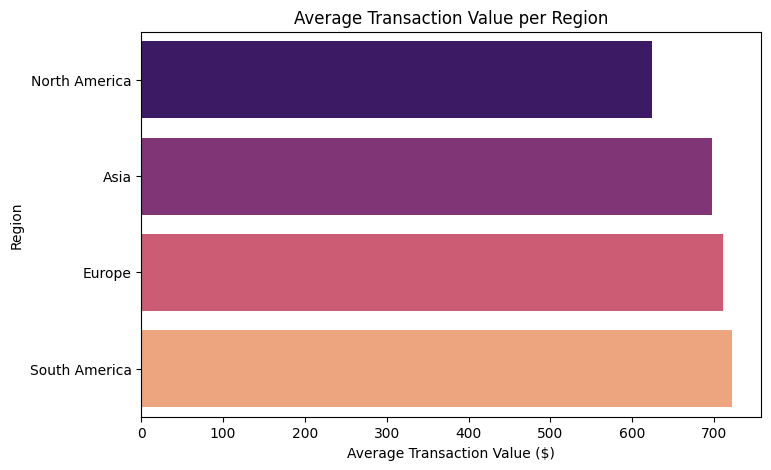

In [11]:

region_sales = transactions.groupby('Region')['TotalValue'].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='magma')
plt.title("Average Transaction Value per Region")
plt.xlabel("Average Transaction Value ($)")
plt.ylabel("Region")
plt.show()


### Transactions over time

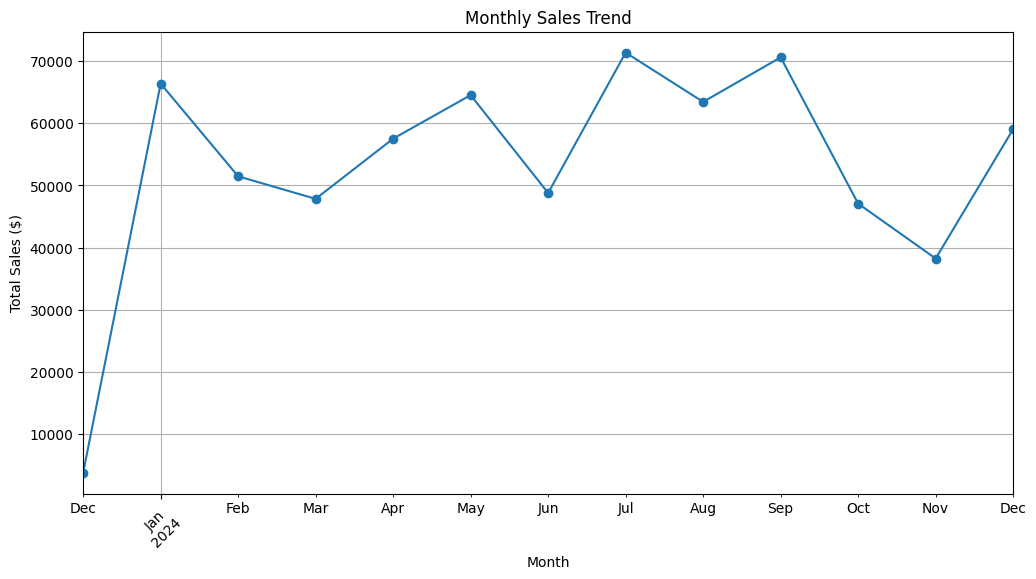

In [12]:

transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Top selling products

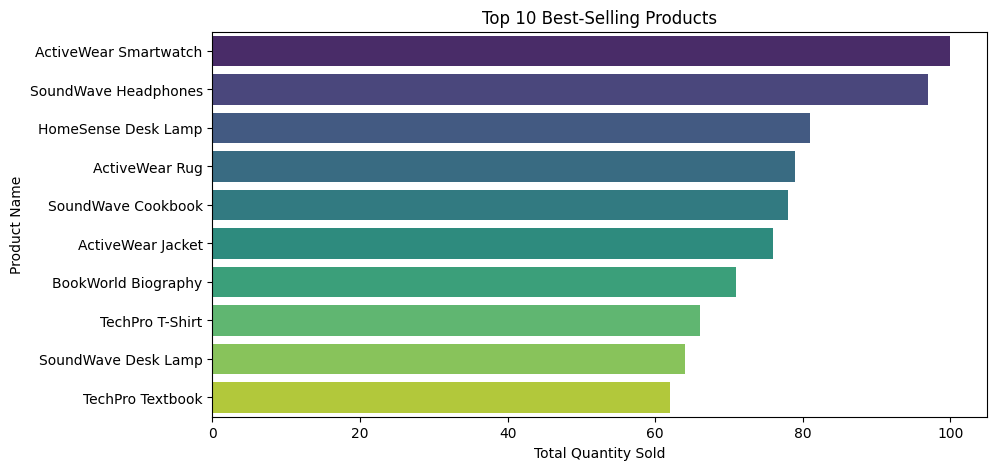

In [13]:

top_products = transactions.groupby('ProductName')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()